# Sesión 1. Introducción a Monte Carlo

## 1.2  Fundamentos del método Monte Carlo 

Monte Carlo es un método de integración basado en el muestreo de variables estocásitcas o aleatorias, si tenemos una integral:

$$
\begin{equation}
G(x)=\int_{\Omega} f(x)dx 
\end{equation}
$$

Esta integral puede ser escrita en terminos de una función $p(x)$:

$$
\begin{equation}
G(x)=\int_{\Omega} p(x)\frac{f(x)}{p(x)}dx \rangle
\end{equation}
$$

 con 
 
 $$\int p(x) dx =1 $$ 
 y 
 $$p(x)\geq 0, \thinspace x\in\Omega$$


Donde $p(x)$ es una distribución de probabilidad, reemplazando por $g(x)=\frac{f(x)}{p(x)}$, sin perdida de generalidad la integral $G(x)$, el valor esperado: 

$$\begin{equation}
G(x)=\int_{\Omega} p(x) g(x) dx = \langle g(x)\rangle
\end{equation}
$$

La integral es interpretada como el valor promedio de $\langle g(x)\rangle$, note que este tipo de integral es similar al valor esperado de un observable fisico en mecanica estadistica.  

La varianza de $g(x)$ con respecto a la districuion $p(x)$ es definida:

$$
\begin{align}
\sigma^2 & =  \mathrm {Var}[g(x)]= \int (g(x)-\langle g(x)\rangle)^2 p(x) dx \\
&  = \int g(x)^2 p(x) dx - 2 \langle g(x)\rangle \int g(x) p(x) dx - \langle g(x)\rangle^2 \int p(x) dx \\
& = \int g(x)^2 p(x) dx - 2 \langle g(x)\rangle \langle g(x)\rangle  - \langle g(x)\rangle^2 \\
& = \int g(x)^2 p(x) dx  - \langle g(x)\rangle^2\\
& = \langle g(x)^2\rangle - \langle g(x)\rangle^2
\end{align}
$$

El error estandar es definido como: 

$$
\sigma_{error}=\frac{\sigma}{\sqrt{n}}
$$


Finalmente, la __ley de numeros grandes__ es una de las piedras angulares de los algoritmos Monte Carlo, esta dice: 

Si $x_{i}$ son un conjunto de numeros aleatorios independientes identicamente distribuidos de acuedo a una distrbucion $p(x)$ se cumple que: 

$$\langle g(x) \rangle =\int_{a}^{b} g(x) p(x) \thinspace\simeq\thinspace\frac{1}{n} \sum_{i} g(x_{i})$$

La integral puede ser calculada aproximadamente como el promedio de la función sobre variables aleatorias distribuidas segun $p(x)$.

### 1.2.1 Ejemplo integrando usando la ley de números grandes

Evaluemos la integral 

$$\int_{0}^{1} e^{x} dx = e^{x}\bigg\rvert_{0}^{1}= e-1 = 2.7182-1=1.7182$$

Ahora podemos hacer la evaluación usan  usando la Ley de números grandes que es la piedra angular del método de Monte Carlo.

In [2]:
#Cargue desde el inicio las bibliotecas necesarias para no lamarlas de nuevo a lo largo del cuaderno jupyter. 
import numpy as np
#%matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt

nsamples=10**np.array([1,2,3,4,5,6,7,8])


for n in nsamples:
    x = np.random.uniform(0, 1, n) #x viene de una distribucion uniforme de numeros independientes 
    sol = np.mean(np.exp(x))
    print('%10d %.6f' % (n, sol))





        10 1.532413
       100 1.672430
      1000 1.729735
     10000 1.719610
    100000 1.717884
   1000000 1.717477
  10000000 1.718376
 100000000 1.718276


### 1.2.2 Teorema del Límite Central y Desigualdad de Chebyshev

El teorema del límite central nos dice que un conjunto de variables aleatorias $x_{i}$, independientes e idénticamente distribuidas, si la substraemos su media a $y_{i}=x_{i}-\langle x \rangle$, construyendo la nueva variable:  


$$ Y=\frac{1}{\sqrt{n}}\sum_{i} y_{i} = \frac{1}{\sqrt{n}}\left(\frac{1}{n}\sum_{i} x_{i}-\langle x \rangle\right)$$

Por cosntruccion el valor esperado de esta nueva variable es nulo $\langle Y \rangle =0$, el teorema del límite central nos dice que la distribución de probabilidad de esta nueva variable $Y$ es una distribución normal o gaussiana con media 0 y varianza $\sigma_{D}^2$:   

$$p(Y_{\lim n\to \infty}) =\frac{1}{\sqrt{2\pi\sigma_{D}^2}}\exp\left(\frac{-Y^2}{2}\right) $$

La utilidad del límite central es dada porque no importa cual es la distribución de $x_{i}$, siempre y cuando todas sean identicamente distribuidas e independientes. Por esto podemos relacionar el teorema con la aproximación de los números largos a la integral. La ley de números largos nos dice que el valor de nuestra integral es el promedio $\bar{x}=\sqrt(n)(\frac{1}{n}\sum_{i} x_{i}$, relacionando este preomedio con la variable Y por definicion tenemos $\bar{x}=\langle x\rangle+Y$m, haciendo ese cambio de variable la distribución de $\bar{x}$, tiene media $\langle x\rangle$ y varianza $\frac{\sigma^2}{n}$:

$$p(\bar{x}) =\sqrt{\frac{N}{2\pi\sigma^2}}\exp{\frac{-(\bar{x}-\langle x\rangle)^2}{2}} $$


De esta manera encontramos el error de $\bar{x}$, sin perdida de generalidad de $\overline{g(x)}$, el cual va a tener varianza $\sigma_{g(x)}=\frac{\sigma^2}{n}$. Ademas $\sigma_{g(x)}$ esta normalmente distribuido y indiferentemente es asintoticamente estimada.

Finalmente, para relacionar la integral con su distribución $p(\bar{x})$ podemos usamos la desigualdad de Chebyshev para mostrar que el valor de $\bar{x}$:


$$p(|x-\langle x \rangle|>\tilde{\epsilon})\leq \frac{\sigma_{D}^2}{\epsilon^2}$$

con $\tilde{\epsilon}=\epsilon\sigma_{D}$, aplicado a nuestro problema $x=\bar{x}$ y $\sigma_D = \frac{\sigma^2}{n}$ :

$$p(|\bar{x}-\langle x \rangle|>\tilde{\epsilon}\sigma)\leq \frac{\sigma^2}{ n^2\tilde{\epsilon}^2} $$ 

Podemos interpretar esta como la probabilidad de desviarse del resultado dado un valor $\epsilon$ fijo, la probabilidad de desvise un cierto $\epsilon$, es inversamente proporcional a la varianza entre el dado $\epsilon$. Es decir si la varianza es del mismo orden de magnitud que $\epsilon$ es altamente probable que que el desvio sea de esa magnitud.      


### 1.2.3 Muestreo Directo  Monte Carlo, integración de $\pi$
Uno de los primeros uso de Monte Carlo conocido historicamente fue el uso de Monte Carlo en la integración de $\pi$, la idea basica es calcular $\pi$ como la razón del area de un cuadrado de lado $l$ y un circulo inscrito dentro del cuadrado de radio $r=\frac{l}{2}$

### 1.2.3.1 Hit or Miss (Acierta o desacierta)
La idea es que $\pi$ es proporcional al número de puntos debajo de una curva, para este caso, se basa en la relacion geometica de las areas de un cuadrado de lado $i$ que inscribe un circulo de radio $l/2$:

$$\frac{\pi}{4} =\frac{\int_{Circulo, r=l/2} dx dy}{\int_{Cuadrado, l} dx dy}$$


<IPython.core.display.Javascript object>


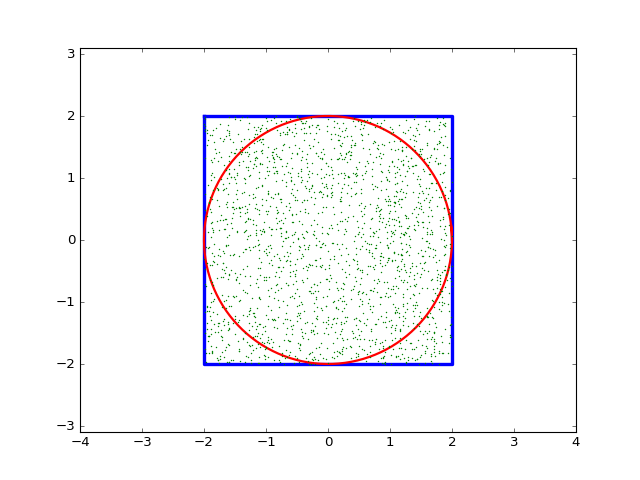

In [3]:
#Dibujando el cuadrado de lado l centrado en (0,0)
#puntos
l =4.0; #longitud lado cuadrado
s=np.arange(-0.5, 0.6125, 0.125);
#print 's',s
npt=s.shape[0]
#print npt
c=np.zeros(npt); #vector de ceros
u=np.ones(npt); # vector de unos

#generando los pares coordenados del perimetro del cuadrado
x=np.concatenate((l*s,0.5*l*u,l*s[::-1],-0.5*l*u), axis=0)
#print 'x',x
y=np.concatenate((0.5*l*u,s[::-1]*l,-.5*l*u,s*l), axis=0);
#print 'y',y
plt.plot(x,y,'b-',linewidth=3);

#dibuja el perimetro del cuadrado
r=0.5*l;
theta=np.arange(0.0,2.05*np.pi,0.05);
rx=r*np.cos(theta);
ry=r*np.sin(theta);
plt.plot(rx,ry,'r-',linewidth=2);

plt.axis('equal');
plt.xlim(-l,l);
plt.ylim(-l,l);


Luego dada de relación geometrica de las areas se puede inferir una relación de proporcionalidad, lanzando puntos aleatorios dentro del cuadrado y al contar el número de puntos dentro del circulo y todos los números dentro del cuadrado la razon de estos es proporcional al area. 

$$\frac{\pi}{4} \propto \frac{Area \thinspace Circulo}{Area \thinspace Cuadrado}\propto \frac{n_{circulo}}{n_{cuadrado}}$$


In [4]:
#generando una distribucion 2d de puntos uniformes
nm=2000; #numero de muestras
sx = np.random.uniform(-0.5*l,0.5*l,nm)
sy = np.random.uniform(-0.5*l,0.5*l,nm)
plt.plot(sx,sy,'g.',markersize=1.5)

#Contar el numero de puntos dentro del circulo
nmc=0;
for i in range(0,nm):
    rp=np.sqrt((sx[i]*sx[i])+(sy[i]*sy[i]));
    #print rp
    if rp<=r:
        nmc=nmc+1;

print "Valor aproximado de pi ", (4.0*nmc)/nm



Valor aproximado de pi  3.146


<IPython.core.display.Javascript object>


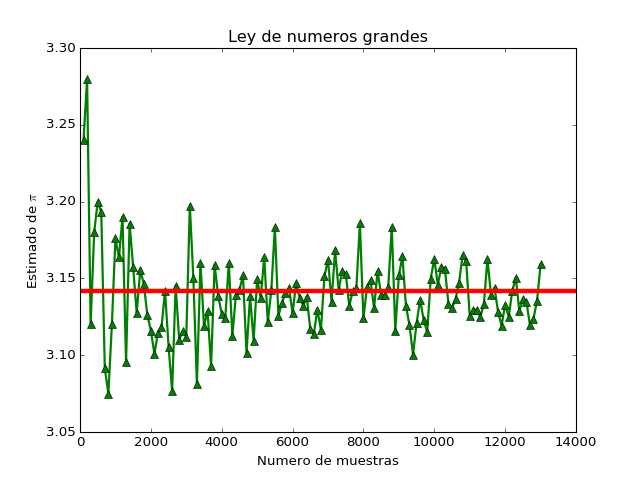

In [5]:

#Implemente una funcion para calcular pi en funcion del numero de muestras
def direct_pi(nint):
    sx = np.random.uniform(-0.5*l,0.5*l,nint)
    sy = np.random.uniform(-0.5*l,0.5*l,nint)
    #Contar el numero de puntos dentro del circulo
    nhits=0;
    for i in range(0,nint):
        rp=np.sqrt((sx[i]*sx[i])+(sy[i]*sy[i]));
        if rp<=r:
            nhits=nhits+1;
    return (4.0*nhits)/nint;


anp=np.arange(100,13100,100);
vpi=np.array([ direct_pi(i) for i in anp ]);

#closing last plot
plt.close()


#starting new plot of the density 
plt.plot(anp,vpi,"g^-",linewidth=2.0,markersize=8.0)    
plt.axhline(y=np.pi,color='r',linewidth=4)
plt.xlabel("Numero de muestras")
plt.ylabel("Estimado de $\pi$ ")
plt.title("Ley de numeros grandes")
    

### 1.2.4. Reduciendo la Varianza, Muestreo de Importancia (Impotance Sampling)

La varianza puede ser afectada por la elección de la función de distribución $p(x)$, supongamos caso mas general en que se integra $g(x)$, usando la Ley de números largos:  

$$
\sigma^2 = \frac{1}{N} \sum_{i} g(x_i)^2  -\left[\frac{1}{N} \sum_{i} g(x_i)\right]^2
$$

Luego para valores grandes de $g(x)$ la varianza aumentara, la varianza aumentara mas aun en el caso que $p(x)>>0$ es alta para un $x$ donde $g(x)>>0$. 

Una manera de disminuir las variaciones es multiplicar por una densidad de probabilidad $h(x)\geq p(x)g(x)$ en los valores donde mas fluctua. 

Si multiplicamos por $\frac{h(x)}{h(x)}$ otra densidad de probabilidad, tal que nuestra nueva función $$\tilde{g}(x)=\frac{p(x)g(x)}{h(x)}$$. Entonces la varianza puede ser estimada al reemplazar $g$ con $\tilde{g}$, escribiendo explicitamente: 

$$
\sigma^2 = \frac{1}{N} \sum_{i} \left( \frac{p(x)g(x)}{h(x)} \right)^2  -\left[\frac{1}{N} \sum_{i} \left( \frac{p(x)g(x)}{h(x)} \right)\right]^2
$$

De esta manera por defición $$\frac{p(x)g(x)}{h(x)}<<1$$ lo cual disminuye las fluctuaciones y por tanto la varianza. 

## 1.3 Monte Carlo usando Cadenas de Markov (Caminos aleatorios)

En el problema descrito anteriormente, podemos observar que deben existir varias formas de muestrear la distribución de tal manera que la eficiencia es aumentada esto significa que un mayor número de puntos sean muestreados dentro del circulo. 

Una manera de hacer esto es generando un camino aleatorio de puntos en secuencia que inicien en algun punto del cuadrado y se muevan aleatoriamente de tal manera que despues de un tiempo el número de puntods dentro del circulo sea mayor que el número de puntos fuera de este. Esta tecnica es conocida como una cadena de markov una secuencia de puntos o estados dentro del espacio de configuración muestreando una cierta distribución de probabilidad. Esta tecnica ha llegado a ser la parte central del algoritmo de Metropolis Monte Carlo, el cual es uno de los algoritmos predominantes en los que esta basado, la gran mayoria de metodos Monte Carlo.  

Para desarrollar una mejor intuición acerca de las cadenas de Markov, estudiemos el siguiente algoritmo para calcular $pi$, imaginen que en vez de solo lanzar puntos dentro del cuadrado y contar los que estan dentro del circulo. Vamos a partir de un punto inicial y movernos por un vector aleatorio uniforme $\delta=(\delta_x,\delta_y)$ y aceptar el nuevo punto si esta dentro del cuadrado. De lo contrario el nuevo punto de la configuración sera el punto anterior que estaba dentro del cuadraro. De nuevo se cuentan los puntos dentro del circulo y del cuadrado para estimar $\pi$.   

<IPython.core.display.Javascript object>


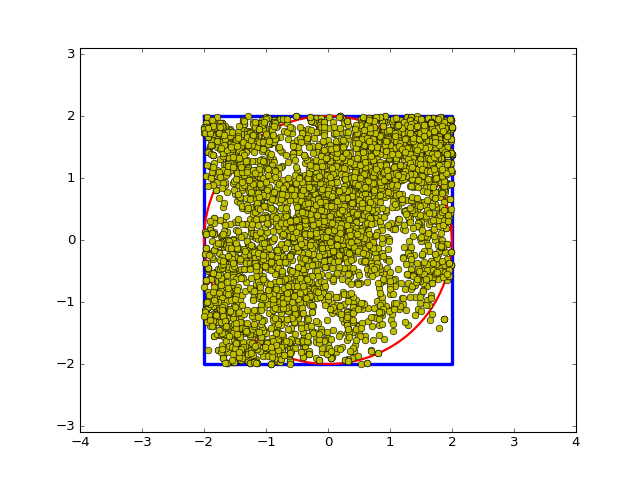

2982 4000 0
Valor aproximado de pi  2.982


In [6]:
#Cerrar Figura anterior
plt.close()
#x,y,rx,ry,l,r = 0.5*x,0.5*y,0.5*rx,0.5*ry, 0.5*l,0.5*r;

#Dibujando el circulo y el cuadrado de nuevo
plt.plot(x,y,'b-',linewidth=3);
plt.plot(rx,ry,'r-',linewidth=2);
plt.axis('equal')
plt.xlim(-l,l)
plt.ylim(-l,l)


delta=0.5;
nm=4000;
nmc=0;
#l=r;
#r=1.0;
sx,sy = 0.0*l,0.0*l;
l2=0.5*l;

dx=np.random.uniform(-0.5*delta,0.5*delta,nm);
dy=np.random.uniform(-0.5*delta,0.5*delta,nm);
for i in range(0,nm):
    
    if sx>l2:
        print sx
    if sy>l2:
         print sy
    #print dx, dy
    xt=sx+dx[i];
    yt=sy+dy[i];
    sxold=sx;
    syold=sy;
    if np.abs(xt)<l2 and np.abs(yt)<l2:
        sx=xt; sy=yt;   
    rp2=((sx*sx)+(sy*sy));
    #print rp
    r2=r*r;
    if rp2 < r2:
        nmc+=1;
        #plt.arrow(sxold, syold, sx, sy, head_width=0.005, head_length=0.1, fc='g', ec='g')
    plt.plot(sx,sy,'yo')
        #print nmc
        #plt.show()
        #print sx,sy
          
        
print nmc,nm, nmc/nm
print "Valor aproximado de pi ", (4.0*nmc)/nm


De que factores depende el muestreo, haga una función que calcule pi, basado en el algoritmo anterior que solamente dependa del valor $\delta$ y el número de intentos, que entregue el número de movimientos aceptados dentro del cuadrado y el valor estimado de $\pi$.  

Genere diferentes gráficas de valores en función de diferentes valores de $\delta$ y diga cual es el valor óptimo, para calcular pi y trate de explicarlo. 

<IPython.core.display.Javascript object>


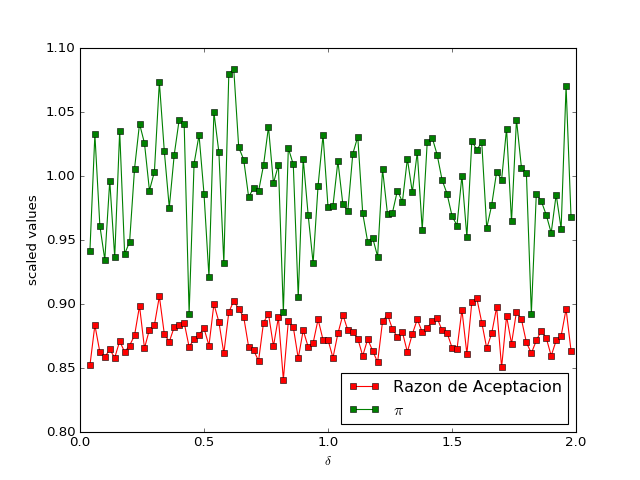

In [7]:
plt.close()

#define python function markov pi
#import random
def markov_pi(dl,nrun):
    nmkc,naccpt,sx,sy=0,0,r,r;
    dx=np.random.uniform(-delta,delta,nrun);
    dy=np.random.uniform(-delta,delta,nrun);
    for i in range(0,nrun):
        if abs(sx+dx[i])<0.5*l and abs(sy+dy[i])<0.5*l:
            sx=sx+dx[i]; sy=sy+dy[i];  
            naccpt+=1
        rp2=((sx*sx)+(sy*sy));
        r2=r*r;
        if rp2 < r2:
            nmkc+=1;
            ##plt.arrow(sxold, syold, sx, sy, head_width=0.005, head_length=0.1, fc='g', ec='g')
            ##plt.plot(sx,sy,'yo')
    #print nmkc,naccpt,(4.0*nmkc)/nrun;
    return naccpt,(4.0*nmkc)/nrun; 
        
#DL=l*np.arange(0.05,1.0,0.05);

DL=np.arange(0.01*l,0.5*l,0.005*l);

#for ii in DL:
#    markov_pi(ii,4000)
NT=2000;
data=np.array([markov_pi(ii,NT) for ii in DL]);
data.shape

plt.plot(DL,data[:,0]/NT,'rs-', label="Razon de Aceptacion")
plt.plot(DL,data[:,1]/np.pi,'gs-',label="$\pi$")
plt.xlabel("$\delta$")
plt.ylabel("scaled values")
plt.legend(loc="best")
#maxElement = np.amax(data[:.0])

#print max(data[:,0])/NT


### 1.3.1 Cadenas de Markov

Las cadenas de Markov consisten en una secuencia sucesiva de estados $\left(x_{1},x_{2},\cdots,x_{n}\right)$ y sus respectivas probabilidades de transición que solo dependen del estado anterior es decir $\mathbf{p}(x_{n}|x_{n-1})$, esta es llamada la matriz de probabilidades de transición y cumple los siguientes requerimientos: 

$$\mathbf{p}(x_{k}|x_{k-1})\geq 0 $$ 

y

$$\sum_{x_{k-1}}\mathbf{p}(x_{k}|x_{k-1})=1$$ 

Si queremos usar la candena de Markov para muestrear la distribucion de probabilidad de equilibrio $P_{eq}(x)$, la transición de probabilidad debe satisfacer la condición estacionaria:

$$\sum_{i}\mathbf{p}(x_{f}|x_{i})P_{eq}(x_{i})=\sum_{i}\mathbf{p}(x_{i}|x_{f})P_{eq}(x_{f})=P_{eq}(x_f)$$


Esta condición requiere que si comienza de una condición inicial arbitraria $P_{eq}(x)$ despues de un repetido muestreo de la transición de probabilidad debe seguir muestrando la distribucion $P_{eq}(x)$. Otra condición que debe cumplir es que debe llegar a la distribucion deseada en un número finito de pasos. Esto significa que:

$$\lim_{n\to\infty} P(0)\mathbf{p}^n=P_{eq}$$

Es decir hay una distribucion limitante de la canena de markov dada una matriz de trnasicion y queremos que esa sea la distribucion de equilibrio. 


Por ejemplo si tenemos uma matriz de transición de probabilidad $\mathbf{p}$ para tres estados:

$$\mathbf{p}=\begin{bmatrix}
0.3 & 0.25 & 0.45\\
0.4 & 0.5 & 0.1\\
0.6 & 0.1 & 0.3\\
\end{bmatrix}$$

Parte de la condición incial

$$P(0)=\begin{bmatrix}
0.3 & 0.4 & 0.3\\
\end{bmatrix}$$

In [ ]:
#Matriz Transicion probabilidadndad 
p=np.array([[0.3, 0.25, 0.45],[0.4, 0.5,0.1],[0.6,0.1,0.3]]);
P0=np.array([0.1,0.5,0.4]);

P=P0;
for i in range(0,15):
    P=np.dot(P,p);
    print P    
    
##cambie la condicion inicial y repital el mismo proceso    
    

La distribución de probabilidad $P_{eq}$, fue independiente de la condición inicial, además es un autovector de la matriz de la transición de probabilidad con autovalor 1. Los otros autovectores tienen autovalor menor que 1 y controntran la razón de transición a la probabilidad limite o de equilibrio. Esta es una consecuencia del teorema Perron-Frobenius el cual aplica a matrices no-negativas y ergodicas. 

In [ ]:
#Ejercicio compruebe que Peq es un autovector de la matriz de probabilidad de transicion

### 1.3.2 Metropolis Monte Carlo

Sin embargo con las dos condiciónes anteriores hay multiples elecciones para la transición de probabilidad.
El metodo de Metropolis impone __la condición de balance detallado__: 

$$\mathbf{p}(x_{f}|x_{i})P_{eq}(x_{i})=\mathbf{p}(x_{i}|x_{f})P_{eq}(x_{f})$$

Esta condición exige ergodicidad haciendo que tenga el mismo número de estados de transición cuando va del estado $x_{i}$ a $x_{f}$ y viceversa.

Además, esta condición impone que la matriz limite sea $P_{eq}$, es decir con esto podemos construir una matriz transición de probailidad que converge a la distribucion de equilibrio que se requiera. 

Sin embargo, aun con las restricciones regulares de una cadena de Markov y la condición de balance detallado hay mucha libertad para escoger como construir $\mathbf{p}$. Mettropolis propuso escribir la probabilidad de transición como el producto de transición de acceptacion y la probabilidad de prueba o proposicion:

$$\mathbf{p}(x_{f}|x_{i}) = p_{accept}(x_{f}|x_{i})T(x_{f}|x_{i})$$

Reescrbiendo la condición de balance detallado tenemos: 

$$p_{accept}(x_{f}|x_{i})T(x_{f}|x_{i})P_{eq}(x_{i})=p_{accept}(x_{i}|x_{f})T(x_{i}|x_{f})P_{eq}(x_{f})$$

reagrupando los terminos de la condiciónd e balance detallado tenemos:

$$\frac{p_{accept}(x_{f}|x_{i})}{p_{accept}(x_{i}|x_{f})}=\frac{T(x_{i}|x_{f})P_{eq}(x_{f})}{T(x_{f}|x_{i})P_{eq}(x_{i})}$$

Ahora si 

$$\frac{T(x_{i}|x_{f})P_{eq}(x_{f})}{T(x_{f}|x_{i})P_{eq}(x_{i})}>1$$

Sera aceptado con probabilidad

$$p_{accept}(x_{f}|x_{i})=1$$

$$p_{accept}(x_{i}|x_{f})=\frac{T(x_{f}|x_{i})P_{eq}(x_{i})}{T(x_{i}|x_{f})P_{eq}(x_{f})}$$

Lo cual satisface la condición de balance detallado, de manera similar cuando:

$$\frac{T(x_{i}|x_{f})P_{eq}(x_{f})}{T(x_{f}|x_{i})P_{eq}(x_{i})}<1$$

La probabilidad de aceptación: 

$$p_{accept}(x_{f}|x_{i})=\frac{T(x_{i}|x_{f})P_{eq}(x_{f})}{T(x_{f}|x_{i})P_{eq}(x_{i})}$$

$$p_{accept}(x_{i}|x_{f})= 1$$

Este criterio puede ser resumido como 

$$p_{accept}(x_{i}|x_{f})= Min\left\{1,\frac{T(x_{i}|x_{f})P_{eq}(x_{f})}{T(x_{f}|x_{i})P_{eq}(x_{i})}\right\}$$


Por ultimo queda a determinar la eleccion de de la probabilidad de prueba $T(x^{'}|x)$, en el algoritmo original de metropolis propone que esta sea simetrica:

$$T(x_{i}|x_{f}) =T(x_{f}|x_{i})$$

Luego el criterio de aceptación del algoritmo de Metropolis depende solo de $P_{eq}$ 

$$p_{accept}(x_{i}|x_{f})= Min\left\{1,\frac{P_{eq}(x_{f})}{P_{eq}(x_{i})}\right\}$$


Cuando $$T(x_{i}|x_{f}) \neq T(x_{f}|x_{i})$$ es conocido como el __algorithmo de Metropolis-Hastings__, una adecuada eleccion de la probabilidad de prueba puede ser de gran beneficio para mejorar el muestreo de la distribucion. 


### 1.3.3 Receta Algoritmo de Metropolis


1. Proponer un movimiento al generar una configuracion $x'$ de acuerdo a la probabilidad de proposicion T(x'|x_{n})


2. Acepte o rechaze el movimiento, se genera un número aleatorio $\eta\in[0,1)$ si $p_{accept}(x'|x_{n})>1$ es aceptado  $x_{n+1}=x'$, de lo contrario es rechazado y $x_{n+1}=x_{n}$. 

En el caso que $x'=x+\zeta$, con cita un número aleatorio uniformemente distribuido entre $[-a,a]$, $T(x^{'}|x)=\frac{1}{2a}$ luego $$T(x'|x) =T(x|x')$$ que es la misma eleccion de Metropolis. El hecho que el criterio de aceptación solo quede dependiendo de la razon de la probabilidad de equilibrio entre la configuracion anterior y la propuesta, es una simplicacion substancial. De hecho ya que por elemplo en el emsamble canonico la distribucion de probabilidad de un sistema es la distribucion de Maxwell-Boltzmann: 

$$P_{eq}=\frac{\exp\left(-\beta E\right)}{Z}$$ donde $$ Z = \int \exp\left(-\beta E\right)  dp dq $$ $\beta=\frac{1}{k_{B}T}$

La mayor parte de las veces no podemos calcular Z directamente, de lo contrario no habria necesidad de usar Monte Carlo para muestrear la distribucion y encontrar la distribucion de equilibrio. 


## 1.4 El Modelo de Ising 

El modelo de Ising fue introducido inicialmente para explicar la observación la observación de magnetización expontanea cuando un material ferrogmanético es enfriado por la valores debajo de la temperatura de Curie. Desde entonces historicamente ha desempeñado un rol importante en Física como un ejemplo de transiciónes de fase. Además, su modificación, extensión y generalización a diferentes situaciones ha sido particularmente prolifica en Física ayudando a entender bastas y diferentes situaciones en multiples sitemas físicos.   

Basicamente es una red en la que cada sitio tiene un spin up-down $\pm 1$ e interactua solamente con sus primeros vecinos como muestra la figura de abajo, es decir los que estan solo a un sitio de red de distancia. 

In [ ]:
plt.close()
#grid LxL
L=6;
x=np.arange(1,L+1)
S = [np.random.choice([1, -1]) for k in range(N)]

for i in x:
    for j in x:
        plt.plot(i,j,'ro')
        plt.arrow(i, j-(S[i+(j*L)]*0.25), 0.0, (S[i+(j*L)]*0.25), head_width=0.05, head_length=0.25, fc='g', ec='g')

#plt.grid(b=True, which='major', color='#666666', linestyle='-')

        
plt.arrow(L/2, L/2, 0, 0.7, head_width=0.05, head_length=0.25, fc='b', ec='b')
plt.arrow(L/2, L/2, 0.7, 0, head_width=0.05, head_length=0.25, fc='b', ec='b')
plt.arrow(L/2, L/2, -0.7, 0, head_width=0.05, head_length=0.25, fc='b', ec='b')
plt.arrow(L/2, L/2, 0, -0.7, head_width=0.05, head_length=0.25, fc='b', ec='b')
#plt.show()        

El hamiltoniano es definido como:

$$E=-J\sum_{<ij>}s_{i}s_{j}-\mathit{h} \sum_{i}^{N} s_i $$

Aqui $<ij>$ denota la suma sobre los vecinos cercanos, $J$ es el parámetro que cuantifica la energía de interación mejor conocido como la energía de intercambio. $\mathit{h}$ es el campo magnético externo, es facil observar que el campo rompe la simetria de la enérgia de interación entre los sitios, es decir da una preferencia a minimizar la energía dependiendo de la orientacion del spin de los atomos en la red. Disminuyendo la energía en el caso que el spin es paralelo al campo magnético externo.   

La diferencia entre el caso 1d y 2d, esta definido solamente por la interacción con sus vecinos, en el caso 1d cada sitio de red interactuaria solamente con dos vecinos uno de cada lado. En el caso 2d interactua adicionalmente con los vencinos de arriba y abajo. Lars Onsager resolvio el modelo de Ising en una red cuadrdada de forma análitica con campo magnetico externo cero. Osanger mostro que la hay una transición de fase en la magnetización con el cambio de temperatura critica $T_c$  

$$
\sinh\frac{2J}{k_BT_c}=1
$$


Para esta parte del tutorial queremos mostrar como usar el algoritmo de Metropolis para mostrar como ocurre la transición de fase con la temperatura, además de observar como Cambia la energía con la temperatura el valor de $T_c$. Para esto debemos construir el algoritmo Metropolis en el ensamble canonico, para la red cuadrada del modelo de Ising. 

__Algoritmo Metropolis Monte Carlo del Modelo Ising __

0. Inicialize una red cuadrada de spins aleatorialmente. 
1. Cambie el spin de un sitio de la red Escogido aleatoriamente.
2. Calcule el cambio de la energía en la red al cambiar el spin.
3. Use la probabilidad del sistema canonico con el criterio de Metropolis para aceptar o rechazar el movimiento.
4. Repita 1-3.

Antes de continuar es posible observar que los movimientos son locales es decir solo cambian la energía de intercambio con sus vecinos cercanos, la energía de un solo sitio en la red es:

$$
E_i = s_i (J\sum_{j}s_j+h)
$$

Al cambiar el spin de un sitio $i$ de $\pm 1$ a $\mp 1$, el cambio de energía es

$$
\Delta E = 2s_i (J\sum_{j}s_j+h)
$$

__Observables__

En el ensamble canonico el valor esperado de un observable $O$ a una temperatura T, esta dado por:

$$
\langle O\rangle=\frac{\sum_{i\in\mathcal{S}}O_ie^{-\frac{E_\gamma}{k_bT}}}{\sum_{\gamma\in\mathcal{S}}e^{-\frac{E_\gamma}{k_bT}}}
$$

Donde se suma sobre todas las configuraciones posibles $\gamma$, lo cual crece factorialmente con el tamaño de la red, solo para el caso 2D existe la solución de Osanger en el limite termodinamico. El valor esperado del observable es estimado como el promedio sobre las configuraciones despues de un tiempo de termalizacion. 

$$
\langle O\rangle\approx\frac{1}{\#\, of\, Monte\, Carlo\, Steps}\sum{O_i}
$$

La magnetizacion es calculada promediando el spin de los sitios de la red, para las configuracion generadas, si $N=L\times L$, el numero de sitios en la red cuadrada: 


$$
M  = \frac{1}{N}\sum_{i=1}^{N}s_i
$$

La energía por spin:
$$
\epsilon_i = \frac{\frac{-J}{2}\sum_{(i,j)}s_is_j-h\sum_i s_i}{N}
$$

El factor $\frac{1}{2}$ es para evitar soble conteo de la energía sobre pares de espin. 

Desarrolle los siguientes pasos para terminar con el tutorial.

1. En lo siguiente defina una red cuadrada de lado $L=16$, con una matriz que contiene los indices de los vecinos. 

2. Escriba el algoritmo metropolis para una temperatura fija T=0.2, grafique la configuracion inicial y final de spin asigne dos colores para $\pm1$, escribalo como una matriz.   

3. Use el algorimo metropolis dentro un loop para 20 temperaturas, para canda temperatura calcule el valor esperado de la energía y de la magnetizacion. 

4. Grafique la energía y magnetizacion con el cambio de temperatura, observe que pasa. 

Para esta parte del tutorial vamos a tomar unidades normalizadas $J=1$, $k_B=1$ y campo externo $h=0$. Ejecute  en una celula diferente cada paso. 


## Referencias
1. Statistical Mechanics: Algorithms and Computations, W. Krauth, Oxford University Press, 2006
2. Quantum Monte Carlo Approaches for Correlated Systems, Federico Becca, Sandro Sorella, Cambridge University Press, 2017
3. Monte Carlo Methods, Malvin H. Kalos, Paula A. Whitlock, John Wiley & Sons, 2009
4. Exactly Solved Models in Statistical Mechanics, Dover books on physics, Rodney J. Baxter, Courier Corporation, 2007
